# Gridded Data EMDA
## Ensemble of Meterological Dataset for North America 
### using probabilistc methods to estimate the uncertainty in spatial fields
https://essd.copernicus.org/articles/13/3337/2021/

1.	**Where is the observed data from?** *From weather stations on the ground, using statistical methods to fill in (spatially) daily data as a grid.* https://uofc-my.sharepoint.com/personal/heba_abdelmoaty_ucalgary_ca/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fheba%5Fabdelmoaty%5Fucalgary%5Fca%2FDocuments%2FUnfinished%5Fwork%2FCapstone%2FData&ga=1
2.	**What are the X and Y?**  *They are the grids overlaying the catchment. The X and Y of our project is in  245.25 and 49.55 respectively (so only need to use the one row).*
3.	**What are the 4 scenarios?** *Each scenario represents a predicted socio-economic status and the radiative energy that the globe will reach by the end of the century (4 socio-economic scenarios paired with radiative force we are producing (KJ/m2)).  **SSP1-2.6** = assumes reduced emissions, **SSP2-4.5** = assumes the same trend of emissions as historical, **SSP3-7.0** = medium to high emissions scenario, **SSP5-8.5**=optimal for economic development but with high emissions.*
4.	**What is the Trange?** *Trange = | Tmax – Tmin |    (probably wont need this)*


![Beautiful Sunset](CatchmentGrid_location_basemap.jpg)


# Install Libraries

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy.stats import linregress
from itertools import combinations
import math
from matplotlib.dates import MonthLocator, DateFormatter
import requests
from io import StringIO
import os

# Hard Coded Variables

In [138]:
precip_path = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/obs_precip_final.csv"
tmean_path = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/obs_tmean_final.csv"

## S1 precip

In [139]:
s1_1_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_ACCESS-CM2_ssp126_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_2_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_BCC-CSM2-MR_ssp126_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_3_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_CanESM5_ssp126_r1i1p2f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_4_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_CanESM5_ssp126_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_5_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_CESM2_ssp126_r4i1p1f1_gn_20150101-21010101_cannc_SPQM_07.nc.csv"
s1_6_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_CESM2_ssp126_r10i1p1f1_gn_20150101-21010101_cannc_SPQM_07.nc.csv"
s1_7_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_CMCC-ESM2_ssp126_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_8_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_CNRM-CM6-1_ssp126_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_9_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_CNRM-CM6-1-HR_ssp126_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_10_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_CNRM-ESM2-1_ssp126_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_11_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_EC-Earth3_ssp126_r1i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_12_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_EC-Earth3_ssp126_r4i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_13_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_EC-Earth3-Veg_ssp126_r1i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_14_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_EC-Earth3-Veg_ssp126_r2i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_15_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_FGOALS-g3_ssp126_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_16_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_FGOALS-g3_ssp126_r3i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_17_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_GFDL-ESM4_ssp126_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_18_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_HadGEM3-GC31-LL_ssp126_r1i1p1f3_gn_20150101-21001230_cannc_SPQM_07.nc.csv"
s1_19_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_HadGEM3-GC31-MM_ssp126_r1i1p1f3_gn_20150101-21001230_cannc_SPQM_07.nc.csv"
s1_20_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_INM-CM4-8_ssp126_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_21_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_INM-CM5-0_ssp126_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_22_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_IPSL-CM6A-LR_ssp126_r2i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_23_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_KACE-1-0-G_ssp126_r1i1p1f1_gr_20150101-21001230_cannc_SPQM_07.nc.csv"
s1_24_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_KACE-1-0-G_ssp126_r2i1p1f1_gr_20150101-21001230_cannc_SPQM_07.nc.csv"
s1_25_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_MIROC6_ssp126_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_26_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_MIROC6_ssp126_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_27_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_MPI-ESM1-2-HR_ssp126_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_28_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_MPI-ESM1-2-HR_ssp126_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_29_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_MPI-ESM1-2-LR_ssp126_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_30_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_MPI-ESM1-2-LR_ssp126_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_31_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_NESM3_ssp126_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_32_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_NESM3_ssp126_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_33_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_UKESM1-0-LL_ssp126_r1i1p1f2_gn_20150101-21001230_cannc_SPQM_07.nc.csv"
s1_34_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/precip/reg_pr_day_UKESM1-0-LL_ssp126_r2i1p1f2_gn_20150101-21001230_cannc_SPQM_07.nc.csv"

## S1 tmean

In [140]:
s1_1_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_ACCESS-CM2_ssp126_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_2_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_BCC-CSM2-MR_ssp126_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_3_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_CanESM5_ssp126_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_4_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_CanESM5_ssp126_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_5_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_CESM2_ssp126_r4i1p1f1_gn_20150101-21010101_cannc_SPQM_07.nc.csv"
s1_6_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_CESM2_ssp126_r10i1p1f1_gn_20150101-21010101_cannc_SPQM_07.nc.csv"
s1_7_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_CMCC-ESM2_ssp126_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_8_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_CNRM-CM6-1_ssp126_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_9_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_CNRM-CM6-1-HR_ssp126_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_10_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_CNRM-ESM2-1_ssp126_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_11_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_EC-Earth3_ssp126_r1i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_12_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_EC-Earth3_ssp126_r4i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_13_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_EC-Earth3-Veg_ssp126_r1i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_14_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_EC-Earth3-Veg_ssp126_r2i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_15_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_FGOALS-g3_ssp126_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_16_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_FGOALS-g3_ssp126_r3i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_17_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_GFDL-ESM4_ssp126_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_18_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_HadGEM3-GC31-LL_ssp126_r1i1p1f3_gn_20150101-21001230_cannc_SPQM_07.nc.csv"
s1_19_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_HadGEM3-GC31-MM_ssp126_r1i1p1f3_gn_20150101-21001230_cannc_SPQM_07.nc.csv"
s1_20_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_INM-CM4-8_ssp126_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_21_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_INM-CM5-0_ssp126_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_22_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_IPSL-CM6A-LR_ssp126_r2i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_23_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_KACE-1-0-G_ssp126_r1i1p1f1_gr_20150101-21001230_cannc_SPQM_07.nc.csv"
s1_24_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_KACE-1-0-G_ssp126_r2i1p1f1_gr_20150101-21001230_cannc_SPQM_07.nc.csv"
s1_25_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_MIROC6_ssp126_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_26_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_MIROC6_ssp126_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_27_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_MPI-ESM1-2-HR_ssp126_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_28_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_MPI-ESM1-2-HR_ssp126_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_29_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_MPI-ESM1-2-LR_ssp126_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_30_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_MPI-ESM1-2-LR_ssp126_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_31_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_NESM3_ssp126_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_32_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_NESM3_ssp126_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s1_33_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_UKESM1-0-LL_ssp126_r1i1p1f2_gn_20150101-21001230_cannc_SPQM_07.nc.csv"
s1_34_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1/temp/reg_tas_day_UKESM1-0-LL_ssp126_r2i1p1f2_gn_20150101-21001230_cannc_SPQM_07.nc.csv"


## S2 precip

In [141]:
s2_1_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_2_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_ACCESS-CM2_ssp245_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_3_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_4_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_BCC-CSM2-MR_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_5_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_CanESM5_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_6_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_CanESM5_ssp245_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_7_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_CESM2_ssp245_r4i1p1f1_gn_20150101-21010101_cannc_SPQM_07.nc.csv"
s2_8_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_CESM2_ssp245_r10i1p1f1_gn_20150101-21010101_cannc_SPQM_07.nc.csv"
s2_9_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_CMCC-ESM2_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_10_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_CNRM-CM6-1_ssp245_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_11_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_CNRM-ESM2-1_ssp245_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_12_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_EC-Earth3_ssp245_r1i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_13_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_EC-Earth3_ssp245_r4i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_14_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_EC-Earth3-Veg_ssp245_r1i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_15_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_EC-Earth3-Veg_ssp245_r2i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_16_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_FGOALS-g3_ssp245_r3i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_17_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_GFDL-CM4_ssp245_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_18_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_GFDL-CM4_ssp245_r1i1p1f1_gr2_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_19_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_GFDL-ESM4_ssp245_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_20_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_HadGEM3-GC31-LL_ssp245_r1i1p1f3_gn_20150101-21001230_cannc_SPQM_07.nc.csv"
s2_21_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_INM-CM4-8_ssp245_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_22_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_INM-CM5-0_ssp245_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_23_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_IPSL-CM6A-LR_ssp245_r2i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_24_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_KACE-1-0-G_ssp245_r1i1p1f1_gr_20150101-21001230_cannc_SPQM_07.nc.csv"
s2_25_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_KACE-1-0-G_ssp245_r2i1p1f1_gr_20150101-21001230_cannc_SPQM_07.nc.csv"
s2_26_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_MIROC6_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_27_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_MIROC6_ssp245_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_28_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_MPI-ESM1-2-HR_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_29_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_MPI-ESM1-2-HR_ssp245_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_30_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_MPI-ESM1-2-LR_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_31_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_MPI-ESM1-2-LR_ssp245_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_32_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_MRI-ESM2-0_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_33_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_NESM3_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_34_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_NESM3_ssp245_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_35_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_UKESM1-0-LL_ssp245_r1i1p1f2_gn_20150101-21001230_cannc_SPQM_07.nc.csv"
s2_36_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/precip/reg_pr_day_UKESM1-0-LL_ssp245_r2i1p1f2_gn_20150101-21001230_cannc_SPQM_07.nc.csv"


## S2 tmean

In [142]:
s2_1_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_2_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_ACCESS-CM2_ssp245_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_3_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_AWI-CM-1-1-MR_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_4_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_BCC-CSM2-MR_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_5_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_CanESM5_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_6_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_CanESM5_ssp245_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_7_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_CESM2_ssp245_r4i1p1f1_gn_20150101-21010101_cannc_SPQM_07.nc.csv"
s2_8_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_CESM2_ssp245_r10i1p1f1_gn_20150101-21010101_cannc_SPQM_07.nc.csv"
s2_9_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_CMCC-ESM2_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_10_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_CNRM-CM6-1_ssp245_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_11_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_CNRM-ESM2-1_ssp245_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_12_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_EC-Earth3_ssp245_r1i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_13_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_EC-Earth3_ssp245_r4i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_14_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_EC-Earth3-Veg_ssp245_r1i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_15_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_EC-Earth3-Veg_ssp245_r2i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_16_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_FGOALS-g3_ssp245_r3i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_17_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_GFDL-CM4_ssp245_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_18_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_GFDL-CM4_ssp245_r1i1p1f1_gr2_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_19_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_GFDL-ESM4_ssp245_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_20_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_HadGEM3-GC31-LL_ssp245_r1i1p1f3_gn_20150101-21001230_cannc_SPQM_07.nc.csv"
s2_21_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_INM-CM4-8_ssp245_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_22_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_INM-CM5-0_ssp245_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_23_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_IPSL-CM6A-LR_ssp245_r2i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_24_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_KACE-1-0-G_ssp245_r1i1p1f1_gr_20150101-21001230_cannc_SPQM_07.nc.csv"
s2_25_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_KACE-1-0-G_ssp245_r2i1p1f1_gr_20150101-21001230_cannc_SPQM_07.nc.csv"
s2_26_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_MIROC6_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_27_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_MIROC6_ssp245_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_28_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_MPI-ESM1-2-HR_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_29_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_MPI-ESM1-2-HR_ssp245_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_30_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_MPI-ESM1-2-LR_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_31_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_MPI-ESM1-2-LR_ssp245_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_32_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_MRI-ESM2-0_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_33_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_NESM3_ssp245_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_34_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_NESM3_ssp245_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s2_35_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_UKESM1-0-LL_ssp245_r1i1p1f2_gn_20150101-21001230_cannc_SPQM_07.nc.csv"
s2_36_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2/temp/reg_tas_day_UKESM1-0-LL_ssp245_r2i1p1f2_gn_20150101-21001230_cannc_SPQM_07.nc.csv"


## S3 precip

In [143]:
s3_1_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_ACCESS-CM2_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_2_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_ACCESS-CM2_ssp370_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_3_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_AWI-CM-1-1-MR_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_4_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_BCC-CSM2-MR_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_5_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_CanESM5_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_6_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_CanESM5_ssp370_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_7_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_CESM2_ssp370_r4i1p1f1_gn_20150101-21010101_cannc_SPQM_07.nc.csv"
s3_8_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_CESM2_ssp370_r10i1p1f1_gn_20150101-21010101_cannc_SPQM_07.nc.csv"
s3_9_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_CMCC-ESM2_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_10_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_CNRM-CM6-1_ssp370_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_11_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_CNRM-ESM2-1_ssp370_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_12_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_EC-Earth3_ssp370_r1i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_13_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_EC-Earth3_ssp370_r4i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_14_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_EC-Earth3-Veg_ssp370_r1i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_15_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_EC-Earth3-Veg_ssp370_r4i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_16_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_FGOALS-g3_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_17_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_FGOALS-g3_ssp370_r3i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_18_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_GFDL-ESM4_ssp370_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_19_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_INM-CM4-8_ssp370_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_20_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_INM-CM5-0_ssp370_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_21_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_IPSL-CM6A-LR_ssp370_r1i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_22_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_KACE-1-0-G_ssp370_r1i1p1f1_gr_20150101-21001230_cannc_SPQM_07.nc.csv"
s3_23_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_KACE-1-0-G_ssp370_r2i1p1f1_gr_20150101-21001230_cannc_SPQM_07.nc.csv"
s3_24_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_MIROC6_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_25_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_MIROC6_ssp370_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_26_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_MPI-ESM1-2-HR_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_27_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_MPI-ESM1-2-HR_ssp370_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_28_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_MPI-ESM1-2-LR_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_29_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_MPI-ESM1-2-LR_ssp370_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_30_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_MRI-ESM2-0_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_31_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_UKESM1-0-LL_ssp370_r1i1p1f2_gn_20150101-21001230_cannc_SPQM_07.nc.csv"
s3_32_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/precip/reg_pr_day_UKESM1-0-LL_ssp370_r2i1p1f2_gn_20150101-21001230_cannc_SPQM_07.nc.csv"


## S3 tmean

In [144]:
s3_1_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_ACCESS-CM2_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_2_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_ACCESS-CM2_ssp370_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_3_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_AWI-CM-1-1-MR_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_4_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_BCC-CSM2-MR_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_5_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_CanESM5_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_6_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_CanESM5_ssp370_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_7_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_CESM2_ssp370_r4i1p1f1_gn_20150101-21010101_cannc_SPQM_07.nc.csv"
s3_8_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_CESM2_ssp370_r10i1p1f1_gn_20150101-21010101_cannc_SPQM_07.nc.csv"
s3_9_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_CMCC-ESM2_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_10_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_CNRM-CM6-1_ssp370_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_11_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_CNRM-ESM2-1_ssp370_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_12_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_EC-Earth3_ssp370_r1i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_13_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_EC-Earth3_ssp370_r4i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_14_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_EC-Earth3-Veg_ssp370_r1i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_15_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_EC-Earth3-Veg_ssp370_r4i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_16_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_FGOALS-g3_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_17_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_FGOALS-g3_ssp370_r3i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_18_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_GFDL-ESM4_ssp370_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_19_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_INM-CM4-8_ssp370_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_20_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_INM-CM5-0_ssp370_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_21_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_IPSL-CM6A-LR_ssp370_r1i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_22_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_KACE-1-0-G_ssp370_r1i1p1f1_gr_20150101-21001230_cannc_SPQM_07.nc.csv"
s3_23_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_KACE-1-0-G_ssp370_r2i1p1f1_gr_20150101-21001230_cannc_SPQM_07.nc.csv"
s3_24_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_MIROC6_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_25_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_MIROC6_ssp370_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_26_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_MPI-ESM1-2-HR_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_27_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_MPI-ESM1-2-HR_ssp370_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_28_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_MPI-ESM1-2-LR_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_29_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_MPI-ESM1-2-LR_ssp370_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_30_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_MRI-ESM2-0_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s3_31_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_UKESM1-0-LL_ssp370_r1i1p1f2_gn_20150101-21001230_cannc_SPQM_07.nc.csv"
s3_32_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3/temp/reg_tas_day_UKESM1-0-LL_ssp370_r2i1p1f2_gn_20150101-21001230_cannc_SPQM_07.nc.csv"


## S4 precip

In [145]:
s4_1_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_ACCESS-CM2_ssp585_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_2_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_3_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_BCC-CSM2-MR_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_4_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_CanESM5_ssp585_r1i1p2f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_5_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_CanESM5_ssp585_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_6_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_CESM2_ssp585_r4i1p1f1_gn_20150101-21010101_cannc_SPQM_07.nc.csv"
s4_7_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_CESM2_ssp585_r10i1p1f1_gn_20150101-21010101_cannc_SPQM_07.nc.csv"
s4_8_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_CMCC-ESM2_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_9_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_CNRM-CM6-1_ssp585_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_10_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_CNRM-CM6-1-HR_ssp585_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_11_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_CNRM-ESM2-1_ssp585_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_12_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_EC-Earth3_ssp585_r1i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_13_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_EC-Earth3_ssp585_r4i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_14_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_EC-Earth3-Veg_ssp585_r1i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_15_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_EC-Earth3-Veg_ssp585_r4i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_16_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_17_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_FGOALS-g3_ssp585_r3i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_18_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_GFDL-CM4_ssp585_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_19_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_GFDL-CM4_ssp585_r1i1p1f1_gr2_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_20_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_GFDL-ESM4_ssp585_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_21_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_20150101-21001230_cannc_SPQM_07.nc.csv"
s4_22_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_HadGEM3-GC31-MM_ssp585_r1i1p1f3_gn_20150101-21001230_cannc_SPQM_07.nc.csv"
s4_23_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_INM-CM4-8_ssp585_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_24_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_INM-CM5-0_ssp585_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_25_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_IPSL-CM6A-LR_ssp585_r2i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_26_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_KACE-1-0-G_ssp585_r1i1p1f1_gr_20150101-21001230_cannc_SPQM_07.nc.csv"
s4_27_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_KACE-1-0-G_ssp585_r2i1p1f1_gr_20150101-21001230_cannc_SPQM_07.nc.csv"
s4_28_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_MIROC6_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_29_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_MIROC6_ssp585_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_30_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_31_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_MPI-ESM1-2-HR_ssp585_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_32_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_MPI-ESM1-2-LR_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_33_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_MPI-ESM1-2-LR_ssp585_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_34_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_MRI-ESM2-0_ssp585_r1i2p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_35_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_NESM3_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_36_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_NESM3_ssp585_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_37_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_NorESM2-LM_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_38_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_NorESM2-MM_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_39_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_UKESM1-0-LL_ssp585_r1i1p1f2_gn_20150101-21001230_cannc_SPQM_07.nc.csv"
s4_40_p = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/precip/reg_pr_day_UKESM1-0-LL_ssp585_r2i1p1f2_gn_20150101-21001230_cannc_SPQM_07.nc.csv"


## S4 tmean

In [146]:
s4_1_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_ACCESS-CM2_ssp585_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_2_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_3_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_BCC-CSM2-MR_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_4_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_CanESM5_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_5_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_CanESM5_ssp585_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_6_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_CESM2_ssp585_r4i1p1f1_gn_20150101-21010101_cannc_SPQM_07.nc.csv"
s4_7_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_CESM2_ssp585_r10i1p1f1_gn_20150101-21010101_cannc_SPQM_07.nc.csv"
s4_8_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_CMCC-ESM2_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_9_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_CNRM-CM6-1_ssp585_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_10_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_CNRM-CM6-1-HR_ssp585_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_11_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_CNRM-ESM2-1_ssp585_r1i1p1f2_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_12_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_EC-Earth3_ssp585_r1i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_13_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_EC-Earth3_ssp585_r4i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_14_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_EC-Earth3-Veg_ssp585_r1i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_15_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_EC-Earth3-Veg_ssp585_r4i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_16_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_FGOALS-g3_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_17_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_FGOALS-g3_ssp585_r3i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_18_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_GFDL-CM4_ssp585_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_19_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_GFDL-CM4_ssp585_r1i1p1f1_gr2_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_20_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_GFDL-ESM4_ssp585_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_21_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_20150101-21001230_cannc_SPQM_07.nc.csv"
s4_22_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_HadGEM3-GC31-MM_ssp585_r1i1p1f3_gn_20150101-21001230_cannc_SPQM_07.nc.csv"
s4_23_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_INM-CM4-8_ssp585_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_24_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_INM-CM5-0_ssp585_r1i1p1f1_gr1_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_25_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_IPSL-CM6A-LR_ssp585_r2i1p1f1_gr_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_26_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_KACE-1-0-G_ssp585_r1i1p1f1_gr_20150101-21001230_cannc_SPQM_07.nc.csv"
s4_27_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_KACE-1-0-G_ssp585_r2i1p1f1_gr_20150101-21001230_cannc_SPQM_07.nc.csv"
s4_28_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_MIROC6_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_29_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_MIROC6_ssp585_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_30_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_31_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_MPI-ESM1-2-HR_ssp585_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_32_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_MPI-ESM1-2-LR_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_33_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_MPI-ESM1-2-LR_ssp585_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_34_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_MRI-ESM2-0_ssp585_r1i2p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_35_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_NESM3_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_36_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_NESM3_ssp585_r2i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_37_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_NorESM2-LM_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_38_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_NorESM2-MM_ssp585_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc.csv"
s4_39_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_UKESM1-0-LL_ssp585_r1i1p1f2_gn_20150101-21001230_cannc_SPQM_07.nc.csv"
s4_40_t = "C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4/temp/reg_tas_day_UKESM1-0-LL_ssp585_r2i1p1f2_gn_20150101-21001230_cannc_SPQM_07.nc.csv"


# Utility Functions

In [147]:
def filter_dataframe(df, x_value=245.25, y_value=49.55):
    """
    Filter a DataFrame to keep only rows where 'X' is equal to x_value and 'Y' is equal to y_value.

    Parameters:
    - df: pandas DataFrame
    - x_value: Value to match in the 'X' column
    - y_value: Value to match in the 'Y' column

    Returns:
    - pandas DataFrame containing filtered rows
    """
    filtered_df = df[(df['x'] == x_value) & (df['y'] == y_value)]
    return filtered_df

In [148]:
def reshape_dataframe(df, value_column_name):
    """
    Reshape a DataFrame from wide to long format by melting the date columns.

    Parameters:
    - df: pandas DataFrame with 'x', 'y', and date columns
    - value_column_name: Desired name for the value column ('tmean' or 'precip')

    Returns:
    - Reshaped pandas DataFrame with columns 'Date' and 'Value'
    """
    # Melt the DataFrame, keeping 'x' and 'y' as identifiers
    melted_df = pd.melt(df, id_vars=['x', 'y'], var_name='Date', value_name=value_column_name)

    # Remove 'X' from the beginning of 'Date' values, if present
    melted_df['Date'] = melted_df['Date'].str.replace('X', '')

    # Convert the 'Date' column to datetime format
    melted_df['Date'] = pd.to_datetime(melted_df['Date'], errors='coerce')  # Use errors='coerce' to handle invalid date formats

    # Sort the DataFrame by the 'Date' column
    melted_df = melted_df.sort_values(by='Date')

    return melted_df[['Date', value_column_name]]


In [149]:
def merge_dataframes(df_tmean, df_precip):
    """
    Merge two DataFrames based on the 'Date' column.

    Parameters:
    - df_tmean: DataFrame with 'Date' and 'tmean' columns
    - df_precip: DataFrame with 'Date' and 'precip' columns

    Returns:
    - Merged DataFrame on 'Date' column
    """
    merged_df = pd.merge(df_tmean, df_precip, on='Date', how='inner') # inner merge, dont keep values without common date
    merged_df = merged_df.sort_values(by='Date')

    return merged_df

In [210]:
def fill_missing_dates(dataframes_list):
    """
    Fill missing dates in each DataFrame in the given list using linear interpolation.

    Parameters:
    - dataframes_list: List of DataFrames

    Returns:
    - List of DataFrames with missing dates filled using linear interpolation
    """
    filled_dataframes = []

    for df in dataframes_list:
        if 'Date' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['Date']):
            df['Date'] = pd.to_datetime(df['Date'])
            
        if not df.empty:  # Check if DataFrame contains data, some dataframes are empty, some realizations were given without data, dropping those here
            start_date = min(df['Date'])
            end_date = max(df['Date'])
            date_range = pd.date_range(start=start_date, end=end_date)
            full_dates_df = pd.DataFrame({'Date': date_range})
            merged_df = pd.merge(full_dates_df, df, on='Date', how='left')
            merged_df = merged_df.sort_values(by='Date')
            filled_df = merged_df.interpolate(method='linear')
            filled_dataframes.append(filled_df)


    return filled_dataframes

In [151]:
def plot_mean_monthly(df, column_name, title_prefix=""):
    """
    Create an interactive plot for mean monthly data over time with a slider for zooming.

    Parameters:
    - df: DataFrame with 'Date' and specified column
    - column_name: Name of the column for plotting ('tmean' or 'precip')
    - title_suffix: String to be added to the title of the plot (default is an empty string)

    Returns:
    - None (displays the plot)
    """
    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract month and year information
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year

    # Group by month and year, calculate mean data for each group
    mean_monthly_data = df.groupby(['Year', 'Month'])[column_name].mean().reset_index()

    # Filter for the first month of each year
    first_month_of_each_year = mean_monthly_data[mean_monthly_data['Month'] == 1]

    # Plot the mean monthly temperature ore precip over time
    unit = '(°C)' if column_name == 'tmean' else '(cm)'
    plt.figure(figsize=(12, 6))
    plt.plot(mean_monthly_data['Year'].astype(str) + '-' + mean_monthly_data['Month'].astype(str), mean_monthly_data[column_name])
    plt.xlabel('Year-Month')
    plt.ylabel(f'Mean Monthly {column_name.capitalize()} {unit}')
    plt.title(f'{title_prefix} Mean Monthly Temperature Over Time')

    # Display labels for the first month of each year
    plt.xticks(first_month_of_each_year['Year'].astype(str) + '-' + first_month_of_each_year['Month'].astype(str), rotation=45)

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [152]:
# def count_nan_values(dataframes_list):
#     """
#     Count the number of NaN values for each DataFrame in the given list.

#     Parameters:
#     - dataframes_list: List of DataFrames

#     Returns:
#     - List containing count of NaN values for each DataFrame
#     """
#     nan_counts = []
    
#     for df in dataframes_list:
#         nan_counts.append(df.isna().sum().sum())

#     return nan_counts

# Data Engineering

## Observed

In [153]:
precip_df = pd.read_csv(precip_path)
precip_df = filter_dataframe(precip_df)
precip_df = reshape_dataframe(precip_df, value_column_name='precip')
precip_df.head()

,Date,precip
0,1979-01-01,2.771100
1,1979-01-02,0.707970
2,1979-01-03,0.117580
3,1979-01-04,0.000000
4,1979-01-05,0.000486


In [154]:
precip_df.describe()

,Date,precip
count,13149,13149.000000
mean,1996-12-31 00:00:00,3.147572
min,1979-01-01 00:00:00,0.000000
25%,1988-01-01 00:00:00,0.191700
50%,1996-12-31 00:00:00,1.114700
75%,2005-12-31 00:00:00,4.027700
max,2014-12-31 00:00:00,74.461000
std,NaN,5.130141


In [155]:
temp_df = pd.read_csv(tmean_path)
temp_df = filter_dataframe(temp_df)
temp_df = reshape_dataframe(temp_df, value_column_name='tmean')
temp_df.head()

,Date,tmean
0,1979-01-01,-24.9175
1,1979-01-02,-21.8485
2,1979-01-03,-22.2550
3,1979-01-04,-23.5575
4,1979-01-05,-21.4305


In [156]:
temp_df.describe()

,Date,tmean
count,13149,13149.000000
mean,1996-12-31 00:00:00,2.163725
min,1979-01-01 00:00:00,-33.621000
25%,1988-01-01 00:00:00,-3.800295
50%,1996-12-31 00:00:00,2.401555
75%,2005-12-31 00:00:00,9.627550
max,2014-12-31 00:00:00,22.321000
std,NaN,9.328360


In [157]:
temp_precip_df = merge_dataframes(temp_df, precip_df)
temp_precip_df.head()

,Date,tmean,precip
0,1979-01-01,-24.9175,2.771100
1,1979-01-02,-21.8485,0.707970
2,1979-01-03,-22.2550,0.117580
3,1979-01-04,-23.5575,0.000000
4,1979-01-05,-21.4305,0.000486


In [158]:
temp_precip_df.describe()

,Date,tmean,precip
count,13149,13149.000000,13149.000000
mean,1996-12-31 00:00:00,2.163725,3.147572
min,1979-01-01 00:00:00,-33.621000,0.000000
25%,1988-01-01 00:00:00,-3.800295,0.191700
50%,1996-12-31 00:00:00,2.401555,1.114700
75%,2005-12-31 00:00:00,9.627550,4.027700
max,2014-12-31 00:00:00,22.321000,74.461000
std,NaN,9.328360,5.130141


In [159]:
temp_precip_df.isna().sum()

Date      0
tmean     0
precip    0
dtype: int64

In [160]:
# save dataframe as csv
output_file_path = 'observed_tmean_precip.csv'
temp_precip_df.to_csv(output_file_path, index=False)

## S1

In [161]:
# precip
s1_1_p_df = pd.read_csv(s1_1_p)
s1_2_p_df = pd.read_csv(s1_2_p)
s1_3_p_df = pd.read_csv(s1_3_p)
s1_4_p_df = pd.read_csv(s1_4_p)
s1_5_p_df = pd.read_csv(s1_5_p)
s1_6_p_df = pd.read_csv(s1_6_p) 
s1_7_p_df = pd.read_csv(s1_7_p)
s1_8_p_df = pd.read_csv(s1_8_p) 
s1_9_p_df = pd.read_csv(s1_9_p)
s1_10_p_df = pd.read_csv(s1_10_p)
s1_11_p_df = pd.read_csv(s1_11_p)
s1_12_p_df = pd.read_csv(s1_12_p)
s1_13_p_df = pd.read_csv(s1_13_p)
s1_14_p_df = pd.read_csv(s1_14_p)
s1_15_p_df = pd.read_csv(s1_15_p)
s1_16_p_df = pd.read_csv(s1_16_p)
s1_17_p_df = pd.read_csv(s1_17_p)
s1_18_p_df = pd.read_csv(s1_18_p)
s1_19_p_df = pd.read_csv(s1_19_p)
s1_20_p_df = pd.read_csv(s1_20_p)
s1_21_p_df = pd.read_csv(s1_21_p)
s1_22_p_df = pd.read_csv(s1_22_p)
s1_23_p_df = pd.read_csv(s1_23_p)
s1_24_p_df = pd.read_csv(s1_24_p)
s1_25_p_df = pd.read_csv(s1_25_p)
s1_26_p_df = pd.read_csv(s1_26_p)
s1_27_p_df = pd.read_csv(s1_27_p)
s1_28_p_df = pd.read_csv(s1_28_p)
s1_29_p_df = pd.read_csv(s1_29_p)
s1_30_p_df = pd.read_csv(s1_30_p)
s1_31_p_df = pd.read_csv(s1_31_p)
s1_32_p_df = pd.read_csv(s1_32_p)
s1_33_p_df = pd.read_csv(s1_33_p)
s1_34_p_df = pd.read_csv(s1_34_p)


# temp
s1_1_t_df = pd.read_csv(s1_1_t)
s1_2_t_df = pd.read_csv(s1_2_t)
s1_3_t_df = pd.read_csv(s1_3_t)
s1_4_t_df = pd.read_csv(s1_4_t)
s1_5_t_df = pd.read_csv(s1_5_t)
s1_6_t_df = pd.read_csv(s1_6_t)
s1_7_t_df = pd.read_csv(s1_7_t)
s1_8_t_df = pd.read_csv(s1_8_t)
s1_9_t_df = pd.read_csv(s1_9_t)
s1_10_t_df = pd.read_csv(s1_10_t)
s1_11_t_df = pd.read_csv(s1_11_t)
s1_12_t_df = pd.read_csv(s1_12_t)
s1_13_t_df = pd.read_csv(s1_13_t)
s1_14_t_df = pd.read_csv(s1_14_t)
s1_15_t_df = pd.read_csv(s1_15_t)
s1_16_t_df = pd.read_csv(s1_16_t)
s1_17_t_df = pd.read_csv(s1_17_t)
s1_18_t_df = pd.read_csv(s1_18_t)
s1_19_t_df = pd.read_csv(s1_19_t) 
s1_20_t_df = pd.read_csv(s1_20_t)
s1_21_t_df = pd.read_csv(s1_21_t)
s1_22_t_df = pd.read_csv(s1_22_t)
s1_23_t_df = pd.read_csv(s1_23_t)
s1_24_t_df = pd.read_csv(s1_24_t)
s1_25_t_df = pd.read_csv(s1_25_t)
s1_26_t_df = pd.read_csv(s1_26_t)
s1_27_t_df = pd.read_csv(s1_27_t)
s1_28_t_df = pd.read_csv(s1_28_t)
s1_29_t_df = pd.read_csv(s1_29_t)
s1_30_t_df = pd.read_csv(s1_30_t)
s1_31_t_df = pd.read_csv(s1_31_t)
s1_32_t_df = pd.read_csv(s1_32_t)
s1_33_t_df = pd.read_csv(s1_33_t)
s1_34_t_df = pd.read_csv(s1_34_t)

In [162]:
dataframe_1_p = [
    s1_1_p_df, s1_2_p_df, s1_3_p_df, s1_4_p_df, s1_5_p_df,
    s1_6_p_df, s1_7_p_df, s1_8_p_df, s1_9_p_df, s1_10_p_df,
    s1_11_p_df, s1_12_p_df, s1_13_p_df, s1_14_p_df, s1_15_p_df,
    s1_16_p_df, s1_17_p_df, s1_18_p_df, s1_19_p_df, s1_20_p_df,
    s1_21_p_df, s1_22_p_df, s1_23_p_df, s1_24_p_df, s1_25_p_df,
    s1_26_p_df, s1_27_p_df, s1_28_p_df, s1_29_p_df, s1_30_p_df,
    s1_31_p_df, s1_32_p_df, s1_33_p_df, s1_34_p_df
]
# Specify the value column name
value_column_name = 'precip'  

# Iterate over the list of dataframes
for i in range(len(dataframe_1_p)):
    # Apply the filter_dataframe function
    dataframe_1_p[i] = filter_dataframe(dataframe_1_p[i])

    # Apply the reshape_dataframe function
    dataframe_1_p[i] = reshape_dataframe(dataframe_1_p[i], value_column_name)


In [163]:
dataframe_1_p[0].head()

,Date,precip
0,2015-01-01,3.015625
1,2015-01-02,6.986373
2,2015-01-03,1.251023
3,2015-01-04,1.344517
4,2015-01-05,0.000000


In [164]:
dataframe_1_t = [
    s1_1_t_df, s1_2_t_df, s1_3_t_df, s1_4_t_df, s1_5_t_df,
    s1_6_t_df, s1_7_t_df, s1_8_t_df, s1_9_t_df, s1_10_t_df,
    s1_11_t_df, s1_12_t_df, s1_13_t_df, s1_14_t_df, s1_15_t_df,
    s1_16_t_df, s1_17_t_df, s1_18_t_df, s1_19_t_df, s1_20_t_df,
    s1_21_t_df, s1_22_t_df, s1_23_t_df, s1_24_t_df, s1_25_t_df,
    s1_26_t_df, s1_27_t_df, s1_28_t_df, s1_29_t_df, s1_30_t_df,
    s1_31_t_df, s1_32_t_df, s1_33_t_df, s1_34_t_df
]
# Specify the value column name
value_column_name = 'tmean'  

# Iterate over the list of dataframes
for i in range(len(dataframe_1_t)):
    # Apply the filter_dataframe function
    dataframe_1_t[i] = filter_dataframe(dataframe_1_t[i])

    # Apply the reshape_dataframe function
    dataframe_1_t[i] = reshape_dataframe(dataframe_1_t[i], value_column_name)

dataframe_1_t[0].head()

,Date,tmean
0,2015-01-01,-9.445138
1,2015-01-02,-9.710489
2,2015-01-03,-10.896101
3,2015-01-04,-9.396120
4,2015-01-05,-6.249529


In [165]:
# List of merged dataframes
merged_dataframes_s1 = []

# Iterate over the indices of the lists
for i in range(min(len(dataframe_1_p), len(dataframe_1_t))):
    # Call your merge_dataframes function with corresponding temp_df and precip_df
    merged_df = merge_dataframes(dataframe_1_p[i], dataframe_1_t[i])

    # Append the merged dataframe to the list
    merged_dataframes_s1.append(merged_df)

In [166]:
merged_dataframes_s1[0].head()

,Date,precip,tmean
0,2015-01-01,3.015625,-9.445138
1,2015-01-02,6.986373,-9.710489
2,2015-01-03,1.251023,-10.896101
3,2015-01-04,1.344517,-9.396120
4,2015-01-05,0.000000,-6.249529


In [167]:
merged_dataframes_s1[5].tail()

,Date,precip,tmean
30877,2099-08-06,1.270362,-5.195292
30878,2099-08-07,0.957527,-5.157176
30879,2099-08-08,0.000000,-6.957615
30880,2099-08-09,2.330950,-4.009791
30881,2099-08-10,7.012457,-4.895466


In [168]:
merged_dataframes_s1[33].tail()

,Date,precip,tmean
29514,2097-05-20,6.863301,-22.778027
29515,2097-05-21,1.699151,-25.025944
29516,2097-05-22,3.271549,-25.005859
29517,2097-05-23,0.000000,-23.868490
29518,2097-05-24,0.000000,-22.705027


In [169]:
filled_dataframes_s1 = fill_missing_dates(merged_dataframes_s1)

In [170]:
merged_dataframes_s1[33].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29519 entries, 0 to 29518
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    29519 non-null  datetime64[ns]
 1   precip  29519 non-null  float64       
 2   tmean   29519 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 692.0 KB


In [171]:
filled_dataframes_s1[33].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30095 entries, 0 to 30094
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    30095 non-null  datetime64[ns]
 1   precip  30095 non-null  float64       
 2   tmean   30095 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 705.5 KB


In [172]:
# Iterate over the merged dataframes for saving
for i, merged_df in enumerate(filled_dataframes_s1):
    # Save the merged dataframe to a CSV file
    csv_filename = f"s1_{i+1}_tmean_precip.csv"  # Naming based on position in the list
    csv_filepath = os.path.join("C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S1", csv_filename)
    merged_df.to_csv(csv_filepath, index=False)


## S2

In [173]:
# precip
s2_1_p_df = pd.read_csv(s2_1_p)
s2_2_p_df = pd.read_csv(s2_2_p)
s2_3_p_df = pd.read_csv(s2_3_p)
s2_4_p_df = pd.read_csv(s2_4_p)
s2_5_p_df = pd.read_csv(s2_5_p)
s2_6_p_df = pd.read_csv(s2_6_p) 
s2_7_p_df = pd.read_csv(s2_7_p)
s2_8_p_df = pd.read_csv(s2_8_p) 
s2_9_p_df = pd.read_csv(s2_9_p)
s2_10_p_df = pd.read_csv(s2_10_p)
s2_11_p_df = pd.read_csv(s2_11_p)
s2_12_p_df = pd.read_csv(s2_12_p)
s2_13_p_df = pd.read_csv(s2_13_p)
s2_14_p_df = pd.read_csv(s2_14_p)
s2_15_p_df = pd.read_csv(s2_15_p)
s2_16_p_df = pd.read_csv(s2_16_p)
s2_17_p_df = pd.read_csv(s2_17_p)
s2_18_p_df = pd.read_csv(s2_18_p)
s2_19_p_df = pd.read_csv(s2_19_p)
s2_20_p_df = pd.read_csv(s2_20_p)
s2_21_p_df = pd.read_csv(s2_21_p)
s2_22_p_df = pd.read_csv(s2_22_p)
s2_23_p_df = pd.read_csv(s2_23_p)
s2_24_p_df = pd.read_csv(s2_24_p)
s2_25_p_df = pd.read_csv(s2_25_p)
s2_26_p_df = pd.read_csv(s2_26_p)
s2_27_p_df = pd.read_csv(s2_27_p)
s2_28_p_df = pd.read_csv(s2_28_p)
s2_29_p_df = pd.read_csv(s2_29_p)
s2_30_p_df = pd.read_csv(s2_30_p)
s2_31_p_df = pd.read_csv(s2_31_p)
s2_32_p_df = pd.read_csv(s2_32_p)
s2_33_p_df = pd.read_csv(s2_33_p)
s2_34_p_df = pd.read_csv(s2_34_p)
s2_35_p_df = pd.read_csv(s2_35_p)
s2_36_p_df = pd.read_csv(s2_36_p)


# temp
s2_1_t_df = pd.read_csv(s2_1_t)
s2_2_t_df = pd.read_csv(s2_2_t)
s2_3_t_df = pd.read_csv(s2_3_t)
s2_4_t_df = pd.read_csv(s2_4_t)
s2_5_t_df = pd.read_csv(s2_5_t)
s2_6_t_df = pd.read_csv(s2_6_t)
s2_7_t_df = pd.read_csv(s2_7_t)
s2_8_t_df = pd.read_csv(s2_8_t)
s2_9_t_df = pd.read_csv(s2_9_t)
s2_10_t_df = pd.read_csv(s2_10_t)
s2_11_t_df = pd.read_csv(s2_11_t)
s2_12_t_df = pd.read_csv(s2_12_t)
s2_13_t_df = pd.read_csv(s2_13_t)
s2_14_t_df = pd.read_csv(s2_14_t)
s2_15_t_df = pd.read_csv(s2_15_t)
s2_16_t_df = pd.read_csv(s2_16_t)
s2_17_t_df = pd.read_csv(s2_17_t)
s2_18_t_df = pd.read_csv(s2_18_t)
s2_19_t_df = pd.read_csv(s2_19_t) 
s2_20_t_df = pd.read_csv(s2_20_t)
s2_21_t_df = pd.read_csv(s2_21_t)
s2_22_t_df = pd.read_csv(s2_22_t)
s2_23_t_df = pd.read_csv(s2_23_t)
s2_24_t_df = pd.read_csv(s2_24_t)
s2_25_t_df = pd.read_csv(s2_25_t)
s2_26_t_df = pd.read_csv(s2_26_t)
s2_27_t_df = pd.read_csv(s2_27_t)
s2_28_t_df = pd.read_csv(s2_28_t)
s2_29_t_df = pd.read_csv(s2_29_t)
s2_30_t_df = pd.read_csv(s2_30_t)
s2_31_t_df = pd.read_csv(s2_31_t)
s2_32_t_df = pd.read_csv(s2_32_t)
s2_33_t_df = pd.read_csv(s2_33_t)
s2_34_t_df = pd.read_csv(s2_34_t)
s2_35_t_df = pd.read_csv(s2_35_t)
s2_36_t_df = pd.read_csv(s2_36_t)

In [174]:
dataframe_2_p = [
    s2_1_p_df, s2_2_p_df, s2_3_p_df, s2_4_p_df, s2_5_p_df,
    s2_6_p_df, s2_7_p_df, s2_8_p_df, s2_9_p_df, s2_10_p_df,
    s2_11_p_df, s2_12_p_df, s2_13_p_df, s2_14_p_df, s2_15_p_df,
    s2_16_p_df, s2_17_p_df, s2_18_p_df, s2_19_p_df, s2_20_p_df,
    s2_21_p_df, s2_22_p_df, s2_23_p_df, s2_24_p_df, s2_25_p_df,
    s2_26_p_df, s2_27_p_df, s2_28_p_df, s2_29_p_df, s2_30_p_df,
    s2_31_p_df, s2_32_p_df, s2_33_p_df, s2_34_p_df, s2_35_p_df, s2_36_p_df
]
# Specify the value column name
value_column_name = 'precip'  

# Iterate over the list of dataframes
for i in range(len(dataframe_2_p)):
    # Apply the filter_dataframe function
    dataframe_2_p[i] = filter_dataframe(dataframe_2_p[i])

    # Apply the reshape_dataframe function
    dataframe_2_p[i] = reshape_dataframe(dataframe_2_p[i], value_column_name)


In [175]:
dataframe_2_t = [
    s2_1_t_df, s2_2_t_df, s2_3_t_df, s2_4_t_df, s2_5_t_df,
    s2_6_t_df, s2_7_t_df, s2_8_t_df, s2_9_t_df, s2_10_t_df,
    s2_11_t_df, s2_12_t_df, s2_13_t_df, s2_14_t_df, s2_15_t_df,
    s2_16_t_df, s2_17_t_df, s2_18_t_df, s2_19_t_df, s2_20_t_df,
    s2_21_t_df, s2_22_t_df, s2_23_t_df, s2_24_t_df, s2_25_t_df,
    s2_26_t_df, s2_27_t_df, s2_28_t_df, s2_29_t_df, s2_30_t_df,
    s2_31_t_df, s2_32_t_df, s2_33_t_df, s2_34_t_df, s2_35_t_df, s2_36_t_df
]
# Specify the value column name
value_column_name = 'tmean'  

# Iterate over the list of dataframes
for i in range(len(dataframe_2_t)):
    # Apply the filter_dataframe function
    dataframe_2_t[i] = filter_dataframe(dataframe_2_t[i])

    # Apply the reshape_dataframe function
    dataframe_2_t[i] = reshape_dataframe(dataframe_2_t[i], value_column_name)


In [176]:
# List of merged dataframes
merged_dataframes_s2 = []

# Iterate over the indices of the lists
for i in range(min(len(dataframe_2_p), len(dataframe_2_t))):
    # Call your merge_dataframes function with corresponding temp_df and precip_df
    merged_df = merge_dataframes(dataframe_2_p[i], dataframe_2_t[i])

    # Append the merged dataframe to the list
    merged_dataframes_s2.append(merged_df)

In [177]:
filled_dataframes_s2 = fill_missing_dates(merged_dataframes_s2)

In [178]:
# Iterate over the merged dataframes for saving
for i, merged_df in enumerate(filled_dataframes_s2):
    # Save the merged dataframe to a CSV file
    csv_filename = f"s2_{i+1}_tmean_precip.csv"  # Naming based on position in the list
    csv_filepath = os.path.join("C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S2", csv_filename)
    merged_df.to_csv(csv_filepath, index=False)


## S3

In [179]:
# precip
s3_1_p_df = pd.read_csv(s3_1_p)
s3_2_p_df = pd.read_csv(s3_2_p)
s3_3_p_df = pd.read_csv(s3_3_p)
s3_4_p_df = pd.read_csv(s3_4_p)
s3_5_p_df = pd.read_csv(s3_5_p)
s3_6_p_df = pd.read_csv(s3_6_p) 
s3_7_p_df = pd.read_csv(s3_7_p)
s3_8_p_df = pd.read_csv(s3_8_p) 
s3_9_p_df = pd.read_csv(s3_9_p)
s3_10_p_df = pd.read_csv(s3_10_p)
s3_11_p_df = pd.read_csv(s3_11_p)
s3_12_p_df = pd.read_csv(s3_12_p)
s3_13_p_df = pd.read_csv(s3_13_p)
s3_14_p_df = pd.read_csv(s3_14_p)
s3_15_p_df = pd.read_csv(s3_15_p)
s3_16_p_df = pd.read_csv(s3_16_p)
s3_17_p_df = pd.read_csv(s3_17_p)
s3_18_p_df = pd.read_csv(s3_18_p)
s3_19_p_df = pd.read_csv(s3_19_p)
s3_20_p_df = pd.read_csv(s3_20_p)
s3_21_p_df = pd.read_csv(s3_21_p)
s3_22_p_df = pd.read_csv(s3_22_p)
s3_23_p_df = pd.read_csv(s3_23_p)
s3_24_p_df = pd.read_csv(s3_24_p)
s3_25_p_df = pd.read_csv(s3_25_p)
s3_26_p_df = pd.read_csv(s3_26_p)
s3_27_p_df = pd.read_csv(s3_27_p)
s3_28_p_df = pd.read_csv(s3_28_p)
s3_29_p_df = pd.read_csv(s3_29_p)
s3_30_p_df = pd.read_csv(s3_30_p)
s3_31_p_df = pd.read_csv(s3_31_p)
s3_32_p_df = pd.read_csv(s3_32_p)


# temp
s3_1_t_df = pd.read_csv(s3_1_t)
s3_2_t_df = pd.read_csv(s3_2_t)
s3_3_t_df = pd.read_csv(s3_3_t)
s3_4_t_df = pd.read_csv(s3_4_t)
s3_5_t_df = pd.read_csv(s3_5_t)
s3_6_t_df = pd.read_csv(s3_6_t)
s3_7_t_df = pd.read_csv(s3_7_t)
s3_8_t_df = pd.read_csv(s3_8_t)
s3_9_t_df = pd.read_csv(s3_9_t)
s3_10_t_df = pd.read_csv(s3_10_t)
s3_11_t_df = pd.read_csv(s3_11_t)
s3_12_t_df = pd.read_csv(s3_12_t)
s3_13_t_df = pd.read_csv(s3_13_t)
s3_14_t_df = pd.read_csv(s3_14_t)
s3_15_t_df = pd.read_csv(s3_15_t)
s3_16_t_df = pd.read_csv(s3_16_t)
s3_17_t_df = pd.read_csv(s3_17_t)
s3_18_t_df = pd.read_csv(s3_18_t)
s3_19_t_df = pd.read_csv(s3_19_t) 
s3_20_t_df = pd.read_csv(s3_20_t)
s3_21_t_df = pd.read_csv(s3_21_t)
s3_22_t_df = pd.read_csv(s3_22_t)
s3_23_t_df = pd.read_csv(s3_23_t)
s3_24_t_df = pd.read_csv(s3_24_t)
s3_25_t_df = pd.read_csv(s3_25_t)
s3_26_t_df = pd.read_csv(s3_26_t)
s3_27_t_df = pd.read_csv(s3_27_t)
s3_28_t_df = pd.read_csv(s3_28_t)
s3_29_t_df = pd.read_csv(s3_29_t)
s3_30_t_df = pd.read_csv(s3_30_t)
s3_31_t_df = pd.read_csv(s3_31_t)
s3_32_t_df = pd.read_csv(s3_32_t)

In [180]:
dataframe_3_p = [
    s3_1_p_df, s3_2_p_df, s3_3_p_df, s3_4_p_df, s3_5_p_df,
    s3_6_p_df, s3_7_p_df, s3_8_p_df, s3_9_p_df, s3_10_p_df,
    s3_11_p_df, s3_12_p_df, s3_13_p_df, s3_14_p_df, s3_15_p_df,
    s3_16_p_df, s3_17_p_df, s3_18_p_df, s3_19_p_df, s3_20_p_df,
    s3_21_p_df, s3_22_p_df, s3_23_p_df, s3_24_p_df, s3_25_p_df,
    s3_26_p_df, s3_27_p_df, s3_28_p_df, s3_29_p_df, s3_30_p_df,
    s3_31_p_df, s3_32_p_df
]
# Specify the value column name
value_column_name = 'precip'  

# Iterate over the list of dataframes
for i in range(len(dataframe_3_p)):
    # Apply the filter_dataframe function
    dataframe_3_p[i] = filter_dataframe(dataframe_3_p[i])

    # Apply the reshape_dataframe function
    dataframe_3_p[i] = reshape_dataframe(dataframe_3_p[i], value_column_name)


In [181]:
dataframe_3_t = [
    s3_1_t_df, s3_2_t_df, s3_3_t_df, s3_4_t_df, s3_5_t_df,
    s3_6_t_df, s3_7_t_df, s3_8_t_df, s3_9_t_df, s3_10_t_df,
    s3_11_t_df, s3_12_t_df, s3_13_t_df, s3_14_t_df, s3_15_t_df,
    s3_16_t_df, s3_17_t_df, s3_18_t_df, s3_19_t_df, s3_20_t_df,
    s3_21_t_df, s3_22_t_df, s3_23_t_df, s3_24_t_df, s3_25_t_df,
    s3_26_t_df, s3_27_t_df, s3_28_t_df, s3_29_t_df, s3_30_t_df,
    s3_31_t_df, s3_32_t_df
]
# Specify the value column name
value_column_name = 'tmean'  

# Iterate over the list of dataframes
for i in range(len(dataframe_3_t)):
    # Apply the filter_dataframe function
    dataframe_3_t[i] = filter_dataframe(dataframe_3_t[i])

    # Apply the reshape_dataframe function
    dataframe_3_t[i] = reshape_dataframe(dataframe_3_t[i], value_column_name)


In [182]:
# List of merged dataframes
merged_dataframes_s3 = []

# Iterate over the indices of the lists
for i in range(min(len(dataframe_3_p), len(dataframe_3_t))):
    # Call your merge_dataframes function with corresponding temp_df and precip_df
    merged_df = merge_dataframes(dataframe_3_p[i], dataframe_3_t[i])

    # Append the merged dataframe to the list
    merged_dataframes_s3.append(merged_df)

In [185]:
merged_dataframes_s3[31]

,Date,precip,tmean
0,2015-01-01,2.896613,1.818723
1,2015-01-02,1.590941,3.829381
2,2015-01-03,0.924428,5.332495
3,2015-01-04,0.850780,8.733269
4,2015-01-05,1.654453,11.186964
...,...,...,...
29514,2097-05-20,7.540779,-2.821707
29515,2097-05-21,0.000000,-1.829097
29516,2097-05-22,0.000000,-5.112856
29517,2097-05-23,0.000000,-5.355492


In [211]:
filled_dataframes_s3 = fill_missing_dates(merged_dataframes_s3)

In [212]:
len(filled_dataframes_s3) # dropped one empty dataframe "s3_5" = reg_tas_day_CanESM5_ssp370_r1i1p1f1_gn_20150101-21001231_cannc_SPQM_07.nc

31

In [214]:
# Iterate over the merged dataframes for saving
for i, merged_df in enumerate(filled_dataframes_s3):
    # Save the merged dataframe to a CSV file
    csv_filename = f"s3_{i+1}_tmean_precip.csv"  # Naming based on position in the list
    csv_filepath = os.path.join("C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S3", csv_filename)
    merged_df.to_csv(csv_filepath, index=False)


## S4

In [215]:
# precip
s4_1_p_df = pd.read_csv(s4_1_p)
s4_2_p_df = pd.read_csv(s4_2_p)
s4_3_p_df = pd.read_csv(s4_3_p)
s4_4_p_df = pd.read_csv(s4_4_p)
s4_5_p_df = pd.read_csv(s4_5_p)
s4_6_p_df = pd.read_csv(s4_6_p) 
s4_7_p_df = pd.read_csv(s4_7_p)
s4_8_p_df = pd.read_csv(s4_8_p) 
s4_9_p_df = pd.read_csv(s4_9_p)
s4_10_p_df = pd.read_csv(s4_10_p)
s4_11_p_df = pd.read_csv(s4_11_p)
s4_12_p_df = pd.read_csv(s4_12_p)
s4_13_p_df = pd.read_csv(s4_13_p)
s4_14_p_df = pd.read_csv(s4_14_p)
s4_15_p_df = pd.read_csv(s4_15_p)
s4_16_p_df = pd.read_csv(s4_16_p)
s4_17_p_df = pd.read_csv(s4_17_p)
s4_18_p_df = pd.read_csv(s4_18_p)
s4_19_p_df = pd.read_csv(s4_19_p)
s4_20_p_df = pd.read_csv(s4_20_p)
s4_21_p_df = pd.read_csv(s4_21_p)
s4_22_p_df = pd.read_csv(s4_22_p)
s4_23_p_df = pd.read_csv(s4_23_p)
s4_24_p_df = pd.read_csv(s4_24_p)
s4_25_p_df = pd.read_csv(s4_25_p)
s4_26_p_df = pd.read_csv(s4_26_p)
s4_27_p_df = pd.read_csv(s4_27_p)
s4_28_p_df = pd.read_csv(s4_28_p)
s4_29_p_df = pd.read_csv(s4_29_p)
s4_30_p_df = pd.read_csv(s4_30_p)
s4_31_p_df = pd.read_csv(s4_31_p)
s4_32_p_df = pd.read_csv(s4_32_p)
s4_33_p_df = pd.read_csv(s4_33_p)
s4_34_p_df = pd.read_csv(s4_34_p)
s4_35_p_df = pd.read_csv(s4_35_p)
s4_36_p_df = pd.read_csv(s4_36_p)
s4_37_p_df = pd.read_csv(s4_37_p)
s4_38_p_df = pd.read_csv(s4_38_p)
s4_39_p_df = pd.read_csv(s4_39_p)
s4_40_p_df = pd.read_csv(s4_40_p)


# temp
s4_1_t_df = pd.read_csv(s4_1_t)
s4_2_t_df = pd.read_csv(s4_2_t)
s4_3_t_df = pd.read_csv(s4_3_t)
s4_4_t_df = pd.read_csv(s4_4_t)
s4_5_t_df = pd.read_csv(s4_5_t)
s4_6_t_df = pd.read_csv(s4_6_t)
s4_7_t_df = pd.read_csv(s4_7_t)
s4_8_t_df = pd.read_csv(s4_8_t)
s4_9_t_df = pd.read_csv(s4_9_t)
s4_10_t_df = pd.read_csv(s4_10_t)
s4_11_t_df = pd.read_csv(s4_11_t)
s4_12_t_df = pd.read_csv(s4_12_t)
s4_13_t_df = pd.read_csv(s4_13_t)
s4_14_t_df = pd.read_csv(s4_14_t)
s4_15_t_df = pd.read_csv(s4_15_t)
s4_16_t_df = pd.read_csv(s4_16_t)
s4_17_t_df = pd.read_csv(s4_17_t)
s4_18_t_df = pd.read_csv(s4_18_t)
s4_19_t_df = pd.read_csv(s4_19_t) 
s4_20_t_df = pd.read_csv(s4_20_t)
s4_21_t_df = pd.read_csv(s4_21_t)
s4_22_t_df = pd.read_csv(s4_22_t)
s4_23_t_df = pd.read_csv(s4_23_t)
s4_24_t_df = pd.read_csv(s4_24_t)
s4_25_t_df = pd.read_csv(s4_25_t)
s4_26_t_df = pd.read_csv(s4_26_t)
s4_27_t_df = pd.read_csv(s4_27_t)
s4_28_t_df = pd.read_csv(s4_28_t)
s4_29_t_df = pd.read_csv(s4_29_t)
s4_30_t_df = pd.read_csv(s4_30_t)
s4_31_t_df = pd.read_csv(s4_31_t)
s4_32_t_df = pd.read_csv(s4_32_t)
s4_33_t_df = pd.read_csv(s4_33_t)
s4_34_t_df = pd.read_csv(s4_34_t)
s4_35_t_df = pd.read_csv(s4_35_t)
s4_36_t_df = pd.read_csv(s4_36_t)
s4_37_t_df = pd.read_csv(s4_37_t)
s4_38_t_df = pd.read_csv(s4_38_t)
s4_39_t_df = pd.read_csv(s4_39_t)
s4_40_t_df = pd.read_csv(s4_40_t)

In [216]:
dataframe_4_p = [
    s4_1_p_df, s4_2_p_df, s4_3_p_df, s4_4_p_df, s4_5_p_df,
    s4_6_p_df, s4_7_p_df, s4_8_p_df, s4_9_p_df, s4_10_p_df,
    s4_11_p_df, s4_12_p_df, s4_13_p_df, s4_14_p_df, s4_15_p_df,
    s4_16_p_df, s4_17_p_df, s4_18_p_df, s4_19_p_df, s4_20_p_df,
    s4_21_p_df, s4_22_p_df, s4_23_p_df, s4_24_p_df, s4_25_p_df,
    s4_26_p_df, s4_27_p_df, s4_28_p_df, s4_29_p_df, s4_30_p_df,
    s4_31_p_df, s4_32_p_df, s4_33_p_df, s4_34_p_df, s4_35_p_df,
    s4_36_p_df, s4_37_p_df, s4_38_p_df, s4_39_p_df, s4_40_p_df
]
# Specify the value column name
value_column_name = 'precip'  

# Iterate over the list of dataframes
for i in range(len(dataframe_4_p)):
    # Apply the filter_dataframe function
    dataframe_4_p[i] = filter_dataframe(dataframe_4_p[i])

    # Apply the reshape_dataframe function
    dataframe_4_p[i] = reshape_dataframe(dataframe_4_p[i], value_column_name)


In [217]:
dataframe_4_t = [
    s4_1_t_df, s4_2_t_df, s4_3_t_df, s4_4_t_df, s4_5_t_df,
    s4_6_t_df, s4_7_t_df, s4_8_t_df, s4_9_t_df, s4_10_t_df,
    s4_11_t_df, s4_12_t_df, s4_13_t_df, s4_14_t_df, s4_15_t_df,
    s4_16_t_df, s4_17_t_df, s4_18_t_df, s4_19_t_df, s4_20_t_df,
    s4_21_t_df, s4_22_t_df, s4_23_t_df, s4_24_t_df, s4_25_t_df,
    s4_26_t_df, s4_27_t_df, s4_28_t_df, s4_29_t_df, s4_30_t_df,
    s4_31_t_df, s4_32_t_df, s4_33_t_df, s4_34_t_df, s4_35_t_df,
    s4_36_t_df, s4_37_t_df, s4_38_t_df, s4_39_t_df, s4_40_t_df
]
# Specify the value column name
value_column_name = 'tmean'  

# Iterate over the list of dataframes
for i in range(len(dataframe_4_t)):
    # Apply the filter_dataframe function
    dataframe_4_t[i] = filter_dataframe(dataframe_4_t[i])

    # Apply the reshape_dataframe function
    dataframe_4_t[i] = reshape_dataframe(dataframe_4_t[i], value_column_name)


In [218]:
# List of merged dataframes
merged_dataframes_s4 = []

# Iterate over the indices of the lists
for i in range(min(len(dataframe_4_p), len(dataframe_4_t))):
    # Call your merge_dataframes function with corresponding temp_df and precip_df
    merged_df = merge_dataframes(dataframe_4_p[i], dataframe_4_t[i])

    # Append the merged dataframe to the list
    merged_dataframes_s4.append(merged_df)

In [219]:
filled_dataframes_s4 = fill_missing_dates(merged_dataframes_s4)

In [220]:
# Iterate over the merged dataframes for saving
for i, merged_df in enumerate(filled_dataframes_s4):
    # Save the merged dataframe to a CSV file
    csv_filename = f"s4_{i+1}_tmean_precip.csv"  # Naming based on position in the list
    csv_filepath = os.path.join("C:/Users/14037/OneDrive - University of Calgary/Documents/ENCI_570/TM_PHES_code/S4", csv_filename)
    merged_df.to_csv(csv_filepath, index=False)


# Plots and Analysis

## Observed

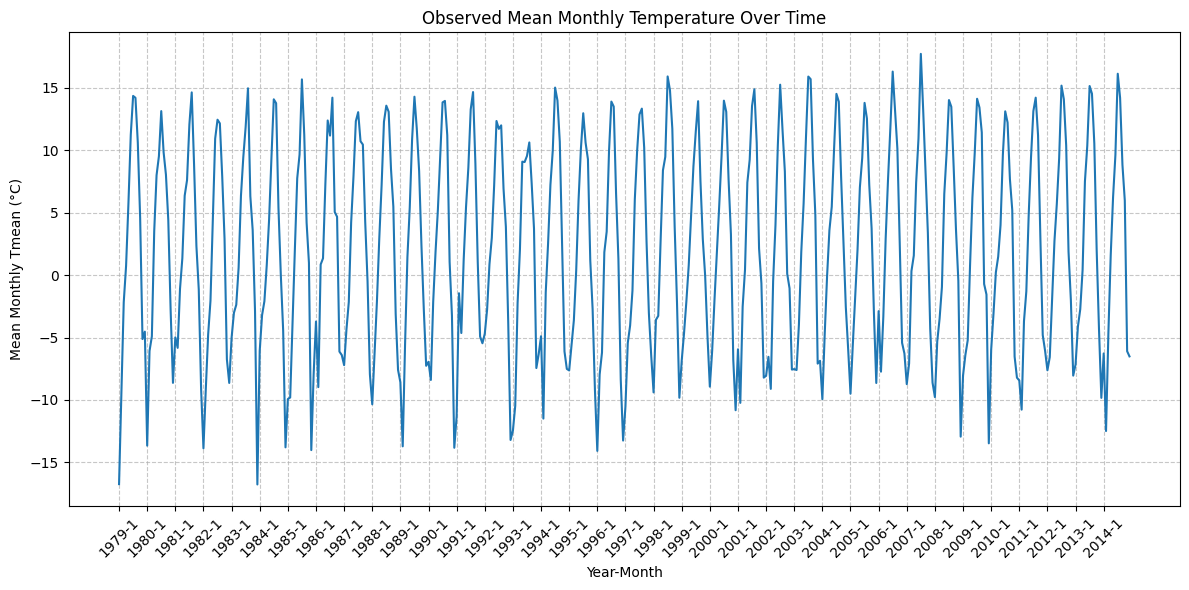

In [221]:
plot_mean_monthly(temp_precip_df, column_name='tmean', title_prefix='Observed')

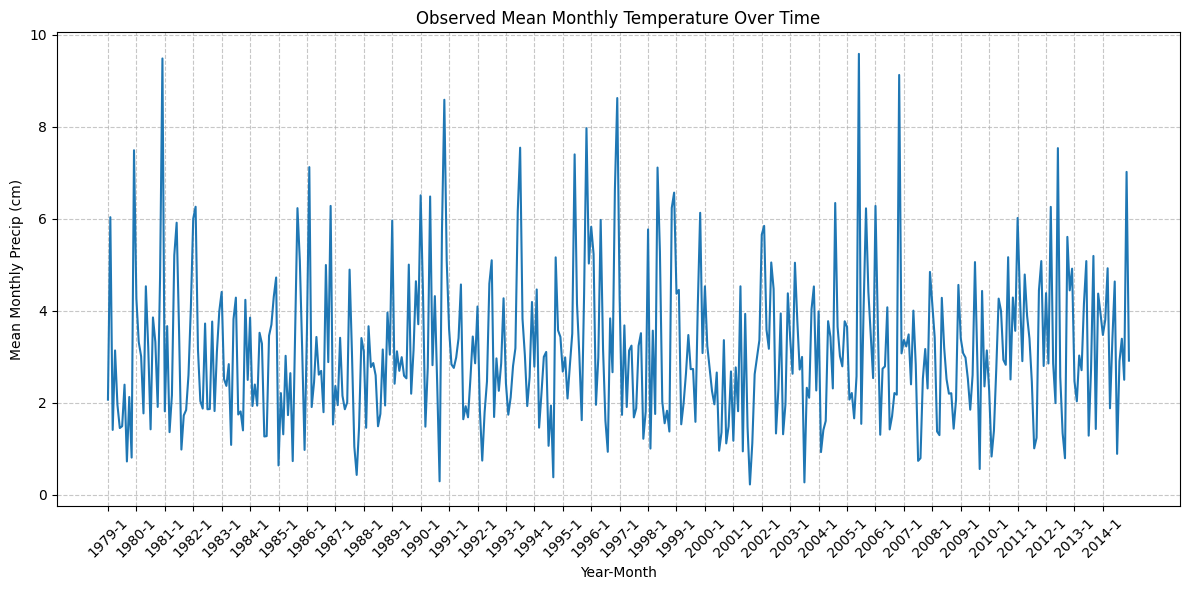

In [222]:
plot_mean_monthly(temp_precip_df, column_name='precip', title_prefix='Observed')